In [1]:
#My First Python ML project - Titanic Survival Prediction

In [2]:
#importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
#Read the training data 
train = pd.read_csv("C:/Users/neant/OneDrive/Desktop/Titanic Project/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Reading the test data 
test = pd.read_csv("C:/Users/neant/OneDrive/Desktop/Titanic Project/test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#checking for null values in train and test sets 
train.isna().sum().sort_values() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [6]:
test.isna().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

In [7]:
#Embarked has only 2 values missing in the training set and Fare which has 1 value missing in the test set
#Deleting these two rows completely 
train.dropna(subset=["Embarked"],inplace=True)
test.dropna(subset=["Fare"],inplace = True)

In [8]:
train.isna().sum().sort_values()
test.isna().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age             86
Cabin          326
dtype: int64

In [9]:
#Dropping some feature that may not be useful to the model such as name or Passenger ID 
train = train.drop(["Name","PassengerId"], axis = 1)
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test = test.drop(["Name","PassengerId"], axis = 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#imputing the mean Age to all missing Age in the data set 
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [12]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#imputing the most frequent value in Cabin for missing Cabin values in the training data set 
train = train.fillna(train.mode().iloc[0,8])

In [14]:
#verifying the results 
train.isna().sum().sort_values()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [15]:
#imputing the mean age in the test set to the missing age values 
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [16]:
#imputing the most frequesnt value in Cabin for missing cabin values in the test data set
test = test.fillna(test.mode().iloc[0,7])

In [17]:
#verifying the results 
test.isna().sum().sort_values()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [18]:
#EDA or Data Vizualizations in the training set 
#first examining the target variable from the training set 
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

C:\Users\neant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

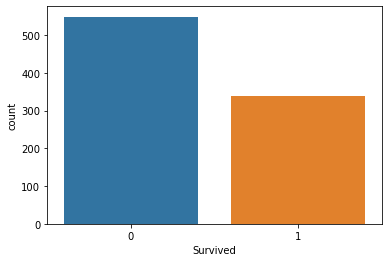

In [19]:
#Plotting the above results 
import seaborn as sns 
sns.countplot('Survived', data = train)

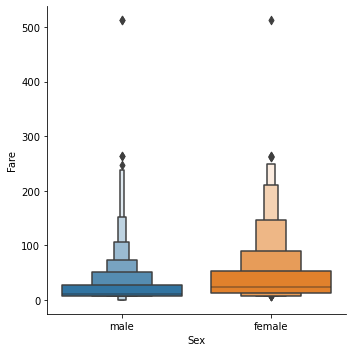

In [20]:
#Comparing the number of male and female according to fare 
sns.catplot(x='Sex',y='Fare',data = train, kind = 'boxen')

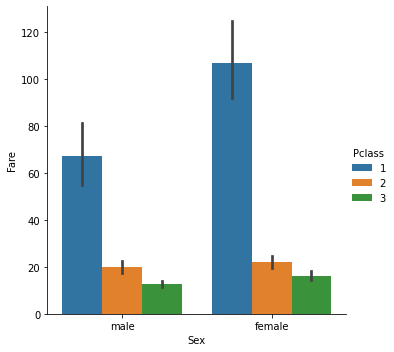

In [21]:
#Seeing the same above results but according to Pclass as well
sns.catplot(x='Sex',y='Fare',data = train, kind = 'bar', hue = 'Pclass')

In [22]:
#correlation Matrix
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074513,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.328256,0.081656,0.016824,-0.548193
Age,-0.074513,-0.328256,1.000000,-0.231908,-0.178013,0.088780
SibSp,-0.034040,0.081656,-0.231908,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178013,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088780,0.160887,0.217532,1.000000


<AxesSubplot:>

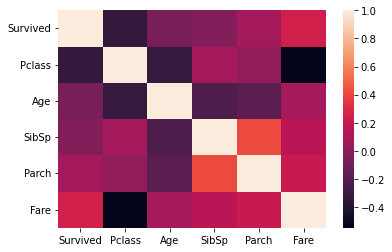

In [23]:
#Heat map from the correlation matrix 
sns.heatmap(train.corr())

In [24]:
#Matrix shows no correlation with Ticket, Cabin, Sex and Embarked  Removing these features from test and training set 
train = train.drop(["Ticket","Cabin","Sex","Embarked"],axis =1 )

In [25]:
test = test.drop(["Ticket","Cabin","Sex","Embarked"],axis =1)

In [26]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [27]:
#Splitting data into x(features) and y(target)
X = train.drop('Survived',axis = 1).values
y = train['Survived'].values

In [28]:
#instantiate an object of Logistic Regression 
logreg = LogisticRegression() 


In [29]:
#fit the model 
logreg.fit(X,y)

LogisticRegression()

In [30]:
#predict the outcome for the test set 
y_pred = logreg.predict(test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [31]:
test['Survived'] = y_pred 

In [32]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,0


In [34]:
#Calculating the Accuracy with the training set, by splitting the training set in 2 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [36]:
#instantiate another object 
logreg_acc = LogisticRegression() 
#Fit the model on X_train and y_ train 
logreg_acc.fit(X_train,y_train) 
#predict for X_test and y_test 
y_pred_acc = logreg_acc.predict(X_test)
#printing the accuracy score: 
print(logreg_acc.score(X_test,y_test))


0.7134831460674157


In [37]:
#testing the accuracy by generating the confusion matrix 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred_acc)

array([[92, 17],
       [34, 35]], dtype=int64)

In [ ]:
#From the score, the model accuracy os 71% and from the confusion matrix, the 92 were correctly labelled not survived and 
#35 were correctly labelled survived